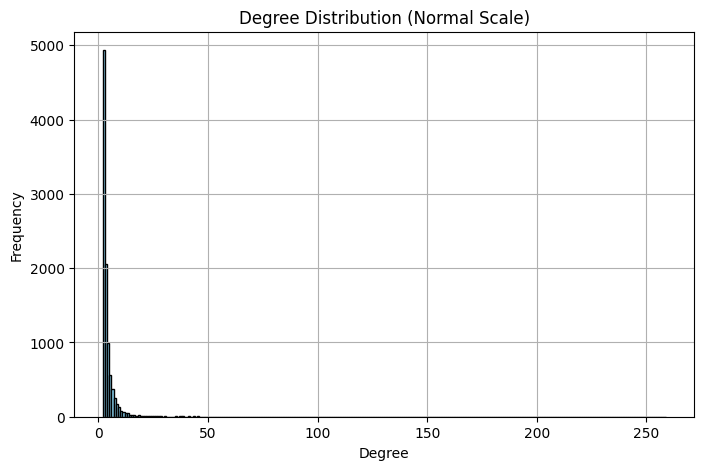

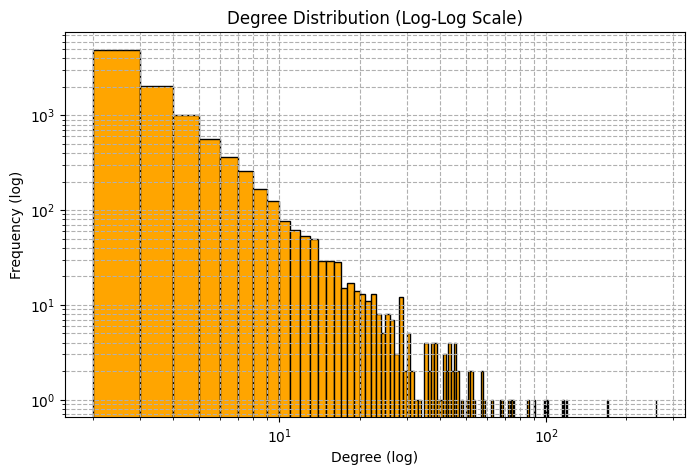

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# # === Parameters ===
# n = 10000  # nodes
# m = 2     # edges to attach from new node to existing nodes

# # === Generate Barabási–Albert Graph ===
# G = nx.barabasi_albert_graph(n=n, m=m)

#  Read Pre-defined
adjlist = 'BA-10000'
G = nx.read_adjlist(f"{adjlist}.txt", nodetype=int)

# # Plot the Graph
# plt.figure(figsize=(10, 7))
# pos = nx.forceatlas2_layout(G)
# nx.draw(G, pos, node_color='blue', edge_color='gray', with_labels=False, node_size=20)
# plt.title("Barabási–Albert Graph")
# plt.show()

# Degree Distribution 
degree_sequence = [deg for node, deg in G.degree()]

# Normal  
plt.figure(figsize=(8, 5))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence)+1), color='skyblue', edgecolor='black')
plt.title("Degree Distribution (Normal Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Log-Log  
plt.figure(figsize=(8, 5))
plt.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence)+1), log=True, color='orange', edgecolor='black')
plt.yscale('log')
plt.xscale('log')
plt.title("Degree Distribution (Log-Log Scale)")
plt.xlabel("Degree (log)")
plt.ylabel("Frequency (log)")
plt.grid(True, which="both", ls="--")
plt.show()

name = "BA-10000.txt"
nx.write_adjlist(G, name)

Save Adjacency List

In [34]:
name = "BA-10000.txt"
nx.write_adjlist(G, name)

In [11]:
import networkx as nx

# Load your graph
adjlist = 'BA-200'
static_graph = nx.read_adjlist(f"{adjlist}.txt", nodetype=int)

# Open a file to save the edge list
with open(f"{adjlist}_edgelist.txt", "w") as f:
    for u, v in G.edges():
        u = u + 1
        v = v + 1
        # Write u -> v
        f.write(f"{u} {v} 1\n")
        # Write v -> u
        f.write(f"{v} {u} 1\n")


In [22]:
import networkx as nx

# Create an empty graph
static_graph = nx.Graph()

# Open the file manually
with open('SIS_Example_EdgeList.txt', 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 3:
            u, v, w = int(parts[0]), int(parts[1]), float(parts[2])
            u = u - 1
            v = v - 1
            static_graph.add_edge(u, v, weight=w)

# Now G is your weighted graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Example: Print edges with weights
for u, v, d in static_graph.edges(data=True):
    print(f"{u} -- {v}, weight: {d['weight']}")


Number of nodes: 16
Number of edges: 37
0 -- 2, weight: 1.0
0 -- 3, weight: 1.0
0 -- 4, weight: 1.0
0 -- 5, weight: 1.0
0 -- 6, weight: 1.0
0 -- 8, weight: 1.0
0 -- 10, weight: 1.0
0 -- 11, weight: 1.0
0 -- 12, weight: 1.0
0 -- 13, weight: 1.0
0 -- 15, weight: 1.0
2 -- 1, weight: 1.0
2 -- 3, weight: 1.0
2 -- 4, weight: 1.0
2 -- 5, weight: 1.0
3 -- 1, weight: 1.0
3 -- 4, weight: 1.0
3 -- 5, weight: 1.0
4 -- 1, weight: 1.0
4 -- 5, weight: 1.0
5 -- 1, weight: 1.0
6 -- 7, weight: 1.0
6 -- 10, weight: 1.0
8 -- 9, weight: 1.0
8 -- 10, weight: 1.0
10 -- 7, weight: 1.0
10 -- 9, weight: 1.0
11 -- 12, weight: 1.0
11 -- 13, weight: 1.0
11 -- 14, weight: 1.0
11 -- 15, weight: 1.0
12 -- 13, weight: 1.0
12 -- 14, weight: 1.0
12 -- 15, weight: 1.0
13 -- 14, weight: 1.0
13 -- 15, weight: 1.0
15 -- 14, weight: 1.0


In [23]:
static_graph.number_of_nodes()

16

Plot saved as 'sis_curve.png'


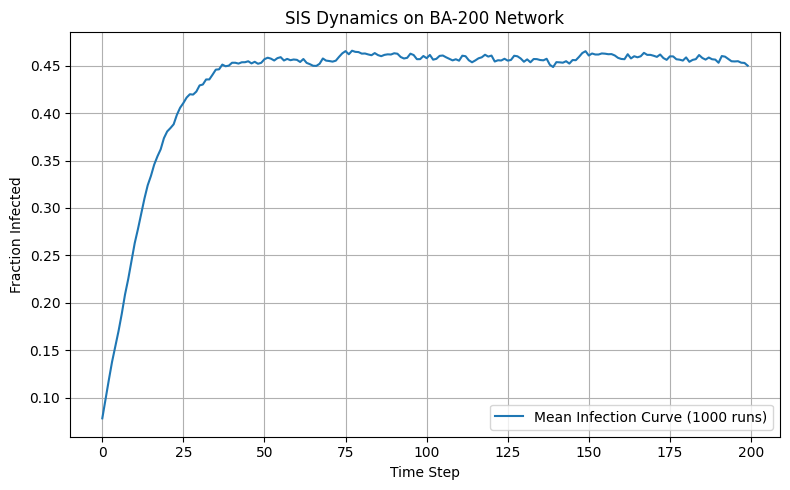

In [36]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
adjlist = 'BA-200'
beta = 0.08    # Infection rate
mu = 0.1       # Recovery rate
n_runs = 1000    # Number of SIS runs
n_steps = 200  # Number of time steps per run
initial_infected_fraction = 0.1  # Fraction of initially infected nodes

# Load graph
# static_graph = nx.read_adjlist(f"../{adjlist}.txt", nodetype=int)
n_nodes = static_graph.number_of_nodes()

# Function to run one SIS simulation
def run_sis(G, beta, mu, steps, initial_fraction):
    # Initialize all nodes as susceptible (0), infected (1)
    states = {node: 0 for node in G.nodes()}
    initial_infected = random.sample(list(G.nodes()), int(initial_fraction * n_nodes))
    for node in initial_infected:
        states[node] = 1

    infected_counts = []

    for _ in range(steps):
        new_states = states.copy()
        for node in G.nodes():
            if states[node] == 1:
                # Recovery
                if random.random() < mu:
                    new_states[node] = 0
            else:
                # Infection from neighbors
                neighbors = list(G.neighbors(node))
                infected_neighbors = sum(states[neighbor] for neighbor in neighbors)
                if infected_neighbors > 0:
                    if random.random() < 1 - (1 - beta) ** infected_neighbors:
                        new_states[node] = 1
        states = new_states
        infected_counts.append(sum(states.values()) / n_nodes)  # Fraction infected

    return infected_counts

# Run multiple simulations
all_curves = []
for _ in range(n_runs):
    curve = run_sis(static_graph, beta, mu, n_steps, initial_infected_fraction)
    all_curves.append(curve)

# Compute mean infection curve
mean_curve = np.mean(all_curves, axis=0)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(mean_curve, label=f"Mean Infection Curve ({n_runs} runs)")
plt.xlabel("Time Step")
plt.ylabel("Fraction Infected")
plt.title("SIS Dynamics on BA-200 Network")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("sis_curve.png")  # <-- Save instead of show
print("Plot saved as 'sis_curve.png'")

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import os

# === Parameters ===
adjlist = 'BA-200'
static_graph = nx.read_adjlist("BA-200.txt", nodetype=int)
N = static_graph.number_of_nodes()

m_values = [0]
activity = 0.01
activity_rates = {node: activity for node in static_graph.nodes}
initial_infected = random.sample(range(N), int(0.05 * N))
timesteps = 150

beta = 0.08
mu = 0.1
num_runs = 1000

csv_file = "sir_summary_results.csv"

# === Run Simulation Function ===
def run_sir_once(m):
    extinction_time = timesteps  # default if infection never dies
    counts = {'S': [], 'I': [], 'R': []}
    # states = {i: 'I' if random.random() < 0.05 else 'S' for i in range(N)}
    states = {i: 'I' if i in initial_infected else 'S' for i in range(N)}
    for step in range(timesteps):
        # Generate temporal layer
        G_temporal = nx.Graph()
        for i in range(N):
            G_temporal.add_node(i)
            if random.random() < activity_rates[i]:
                targets = random.sample([j for j in range(N) if j != i and not static_graph.has_edge(i, j)], m)
                for j in targets:
                    G_temporal.add_edge(i, j)

        # Combine graphs
        G_combined = nx.Graph()
        G_combined.add_edges_from(static_graph.edges())
        G_combined.add_edges_from(G_temporal.edges())

        # Infection update
        new_states = states.copy()
        for node in range(N):
            if states[node] == 'I':
                if random.random() < mu:
                    new_states[node] = 'R'
            elif states[node] == 'S':
                infected_neighbors = sum(1 for neighbor in G_combined.neighbors(node) if states[neighbor] == 'I')
                if infected_neighbors > 0:
                    p_infection = 1 - (1 - beta) ** infected_neighbors
                    if random.random() < p_infection:
                        new_states[node] = 'I'
        states = new_states

        # Count states
        current_I = sum(1 for s in states.values() if s == 'I')
        counts['S'].append(sum(1 for s in states.values() if s == 'S'))
        counts['I'].append(current_I)
        counts['R'].append(sum(1 for s in states.values() if s == 'R'))

        if current_I == 0 and extinction_time == timesteps:
            extinction_time = step

    return counts, extinction_time


for m in m_values:
    # === Run Multiple Simulations ===
    print(f"Running {num_runs} SIR simulations for {timesteps} steps...")
    all_S, all_I, all_R = [], [], []
    extinction_times = []
    peak_times = []
    peak_values = []

    for _ in range(num_runs):
        counts, die_out = run_sir_once(m)
        all_S.append(counts['S'])
        all_I.append(counts['I'])
        all_R.append(counts['R'])
        extinction_times.append(die_out)

        peak_idx = np.argmax(counts['I'])
        peak_val = max(counts['I'])
        peak_times.append(peak_idx)
        peak_values.append(peak_val)

    # === Convert to numpy arrays ===
    all_S = np.array(all_S) / N
    all_I = np.array(all_I) / N
    all_R = np.array(all_R) / N

    # === Compute Averages and StdDev ===
    mean_S = np.mean(all_S, axis=0)
    mean_I = np.mean(all_I, axis=0)
    mean_R = np.mean(all_R, axis=0)

    std_S = np.std(all_S, axis=0)
    std_I = np.std(all_I, axis=0)
    std_R = np.std(all_R, axis=0)

    # === Infection Extinction Stats ===
    avg_extinction_time = np.mean(extinction_times)
    std_extinction_time = np.std(extinction_times)

    avg_peak_time = np.mean(peak_times)
    std_peak_time = np.std(peak_times)
    avg_peak_val = np.mean(peak_values)
    std_peak_val = np.std(peak_values)

    # === Plot ===
    # t = np.arange(timesteps)
    # plt.figure(figsize=(10, 6))

    # plt.plot(t, mean_S, label='Susceptible', color='skyblue', linewidth=2)
    # plt.fill_between(t, mean_S - std_S, mean_S + std_S, color='skyblue', alpha=0.3)

    # plt.plot(t, mean_I, label='Infected', color='red', linewidth=2)
    # plt.fill_between(t, mean_I - std_I, mean_I + std_I, color='red', alpha=0.3)

    # plt.plot(t, mean_R, label='Recovered', color='gray', linewidth=2)
    # plt.fill_between(t, mean_R - std_R, mean_R + std_R, color='gray', alpha=0.3)

    # plt.title(f"Average SIR (Average extinction time: {avg_extinction_time:.2f} ± {std_extinction_time:.2f} steps, peak size: {avg_peak_val:.2f} ± {std_peak_val:.2f},  m={m})")
    # plt.xlabel("Time Step")
    # plt.ylabel("Number of Nodes")
    # plt.ylim(0, N)
    # plt.legend()
    # plt.grid(True)
    # plt.tight_layout()
    # plt.savefig(f"sir_average_curve_m={m}.png", dpi=300)
    # plt.close()
    # print(f"Saved SIR plot as sir_average_curve_m={m}.png")
    

    t = np.arange(timesteps)
    plt.figure(figsize=(12, 7))

    # === Plot all Susceptible curves
    for i in range(num_runs):
        plt.plot(t, all_S[i], color='skyblue', alpha=0.3, linewidth=0.8)

    # === Plot all Infected curves
    for i in range(num_runs):
        plt.plot(t, all_I[i], color='lightcoral', alpha=0.3, linewidth=0.8)

    # === Plot all Recovered curves
    for i in range(num_runs):
        plt.plot(t, all_R[i], color='gray', alpha=0.3, linewidth=0.8)


    # Create summary text
    summary_text = (
        f"$\\beta$ = {beta}, $\\mu$ = {mu}, m = {m}\n"
        f"Extinction: {avg_extinction_time:.2f} ± {std_extinction_time:.2f} steps\n"
        f"Peak Time: {avg_peak_time:.2f} ± {std_peak_time:.2f}\n"
        f"Peak Size: {avg_peak_val:.2f} ± {std_peak_val:.2f}\n"
        f"Max Recovered: {mean_R.max():.2f}"
    )

    # Add the box to the plot
    plt.gcf().text(0.02, 0.75, summary_text, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="white", alpha=0.8))

    # === Overlay the average curves
    plt.plot(t, mean_S, label='Mean Susceptible', color='blue', linewidth=2)
    plt.plot(t, mean_I, label='Mean Infected', color='red', linewidth=2)
    plt.plot(t, mean_R, label='Mean Recovered', color='black', linewidth=2)

    # === Optional: Add uncertainty bands
    plt.fill_between(t, mean_S - std_S, mean_S + std_S, color='skyblue', alpha=0.15)
    plt.fill_between(t, mean_I - std_I, mean_I + std_I, color='red', alpha=0.15)
    plt.fill_between(t, mean_R - std_R, mean_R + std_R, color='gray', alpha=0.15)

    plt.title(f"SIR: All Trajectories with Averages (m={m})")
    plt.xlabel("Time Step")
    plt.ylabel("Fraction of Population")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"sir_all_curves_with_noise_m={m}.png", dpi=300)
    plt.close()
    print(f"✅ Saved SIR full noise plot as sir_all_curves_with_noise_m={m}.png")


    # === Save to DataFrame
    summary_data = {
        'm': [m],
        'Ai': [activity],
        'extinction_time': [avg_extinction_time],
        'extinction_std': [std_extinction_time],
        'peak_time': [avg_peak_time],
        'peak_time_std': [std_peak_time],
        'peak_size': [avg_peak_val],
        'peak_size_std': [std_peak_val], 
        'total mean recovered': [mean_R.max()],
        'Network' : adjlist,
    }
    df = pd.DataFrame(summary_data)

    # === Append to CSV
    if os.path.exists(csv_file):
        existing_df = pd.read_csv(csv_file)
        combined_df = pd.concat([existing_df, df], ignore_index=True)
    else:
        combined_df = df

    combined_df.to_csv(csv_file, index=False)
    print(f"Saved summary to {csv_file}")


Running 1000 SIR simulations for 150 steps...
✅ Saved SIR full noise plot as sir_all_curves_with_noise_m=0.png
Saved summary to sir_summary_results.csv
